# Cognitive Architectures

Objectives:

1. Introduce the concept of cognitive architectures in the context of Observational Network Dynamics (OND).
2. Implement a simple model of modular cognition to understand how specialized components contribute to global cognition.
3. Visualize the evolution of cognitive states over time.

In cognitive architectures, we consider a network of cognitive modules (nodes) that interact to produce global cognition. Here we'll use a simple sigmoid activation function to model the state update of each module based on the inputs it receives from its neighbors.

The state of a cognitive module \(i\) at time \(t+1\) is given by:

\[
s_i(t+1) = s_i(t) + \alpha \left( \sigma\left(\beta \sum_{j \in \text{neighbors}} s_j(t)\right) - s_i(t) \right)
\]

Here, \( \sigma(x) \) is the sigmoid activation function, \( \alpha \) is the rate of state update, and \( \beta \) controls the steepness of the sigmoid function.


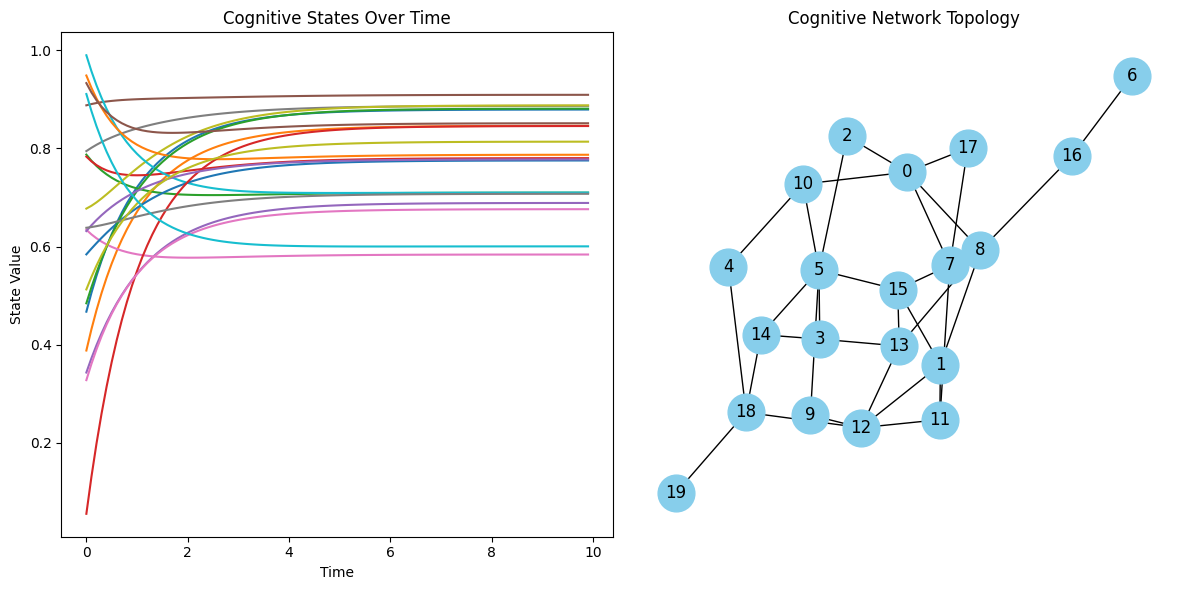

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Importing necessary libraries for the 'Cognitive Architectures in OND' notebook
from scipy.special import expit as sigmoid

# Parameters for the cognitive architecture model
N_modules = 20  # Number of cognitive modules (nodes)
beta = 0.5  # Sigmoid steepness parameter
alpha_cog = 0.1  # Rate of state update

# Generate a random graph to represent the cognitive network
G_cog = nx.erdos_renyi_graph(N_modules, 0.2)
adj_matrix_cog = nx.adjacency_matrix(G_cog).toarray()

# Initial cognitive states for each module
initial_states = np.random.uniform(0, 1, N_modules)

# Time parameters for simulation
dt_cog = 0.1
total_time_cog = 10.0
time_steps_cog = int(total_time_cog / dt_cog)

# Store the states at each time step
states_over_time = np.zeros((time_steps_cog, N_modules))

# Initial state
states_over_time[0, :] = initial_states

# Function to update the cognitive states based on neighbors
def update_states(states, beta, alpha_cog, adj_matrix_cog):
    inputs = np.dot(adj_matrix_cog, states)
    delta_states = sigmoid(beta * inputs) - states
    return states + alpha_cog * delta_states

# Simulate the cognitive dynamics over time
for t in range(1, time_steps_cog):
    states_t = states_over_time[t-1, :]
    states_over_time[t, :] = update_states(states_t, beta, alpha_cog, adj_matrix_cog)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, total_time_cog, dt_cog), states_over_time)
plt.title('Cognitive States Over Time')
plt.xlabel('Time')
plt.ylabel('State Value')

plt.subplot(1, 2, 2)
nx.draw(G_cog, with_labels=True, node_color='skyblue', node_size=700, font_size=12)
plt.title('Cognitive Network Topology')

plt.tight_layout()
plt.show()


The plot on the left shows the evolution of the cognitive states of the modules over time, and the plot on the right shows the topology of the cognitive network.

Would you like to proceed to the next notebook or discuss this one further?